# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [505]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
from tabulate import tabulate as tb
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [225]:
def print_dict(d: dict, key_label = 'Key', item_label = 'Item'):
    print(tb(d.items(), headers = [key_label, item_label]))

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [5]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [6]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [7]:
# Fix IDs doublicates
doublicatesDF = data["ID"].value_counts()
doublicates = doublicatesDF.loc[doublicatesDF > 1].index.tolist()
maxIndex = max(data["ID"].values) + 1
for d in doublicates:
    indexes = data[data["ID"] == d].index.tolist()
    for i in indexes:
        data.loc[i, "ID"] = maxIndex
        maxIndex += 1;
print("Max repeated IDs: ", max(data["ID"].value_counts().values))

Max repeated IDs:  1


In [8]:
# Check dtypes of each column
data.dtypes

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object

In [9]:
# Check mistakes in categorical values
def count_categories(data_frame=data, target_type = 'object', drop_id = True):
    categories = {label : set(data_frame[label].values) for label in data_frame.columns 
                  if data_frame[label].dtypes == target_type and not (drop_id and label == "ID")}
    for key in categories:
        categories[key] = (categories[key], len(categories[key]))
    # Let's watch what categorical values we have in each column
    return categories
#     return categories
print_dict(count_categories())

Key         Item
----------  ---------------------------------------------------------------------
Subject     ({'Por', 'Math'}, 2)
school      ({'GP', 'MS'}, 2)
sex         ({'M', 'F', 'm'}, 3)
address     ({'R', 'U'}, 2)
famsize     ({'GT3', 'LE3'}, 2)
Pstatus     ({'t', 'A', 'T'}, 3)
Medu        ({'2', 'o', '0', '3', '4', '1'}, 6)
Fedu        ({'2', 'o', '0', '3', '4', '1'}, 6)
Mjob        ({'other', 'health', 'services', 'teacher', 'at-home', 'at_home'}, 6)
Fjob        ({'other', 'health', 'services', 'teacher', 'at-home', 'at_home'}, 6)
reason      ({'other', 'home', 'course', 'reputation'}, 4)
guardian    ({'other', 'father', 'futher', 'mother'}, 4)
schoolsup   ({'yes', 'no'}, 2)
famsup      ({'yes', 'no'}, 2)
paid        ({'yes', 'no'}, 2)
activities  ({'yes', 'no'}, 2)
nursery     ({'yes', 'no'}, 2)
higher      ({'yes', 'no'}, 2)
internet    ({'yes', 'no'}, 2)
romantic    ({nan, 'yes', 'no'}, 3)
cheating    ({nan, 'yes', 'no'}, 3)


In [10]:
# Columns with errors:
# sex ('m'), Pstatus ('t'), Medu and Fedu ('0' and strings instead int64)),
# Mjob and Fjob ('at-home' = 'at_home'), guardian ('futher'), 
# romantic and cheating have nan - I'll fix it in the next task  
#
data['sex'].replace('m', 'M', inplace=True)
data['Pstatus'].replace('t', 'T', inplace=True)
data['Medu'].replace('o', '0', inplace=True)
data['Fedu'].replace('o', '0', inplace=True)
data['Mjob'].replace('at-home', 'at_home', inplace=True)
data['Fjob'].replace('at-home', 'at_home', inplace=True)
data['guardian'].replace('futher', 'father', inplace=True)
print_dict(count_categories())

Key         Item
----------  ----------------------------------------------------------
Subject     ({'Por', 'Math'}, 2)
school      ({'GP', 'MS'}, 2)
sex         ({'M', 'F'}, 2)
address     ({'R', 'U'}, 2)
famsize     ({'GT3', 'LE3'}, 2)
Pstatus     ({'A', 'T'}, 2)
Medu        ({'2', '0', '3', '4', '1'}, 5)
Fedu        ({'2', '0', '3', '4', '1'}, 5)
Mjob        ({'other', 'health', 'services', 'teacher', 'at_home'}, 5)
Fjob        ({'other', 'health', 'services', 'teacher', 'at_home'}, 5)
reason      ({'other', 'home', 'course', 'reputation'}, 4)
guardian    ({'other', 'father', 'mother'}, 3)
schoolsup   ({'yes', 'no'}, 2)
famsup      ({'yes', 'no'}, 2)
paid        ({'yes', 'no'}, 2)
activities  ({'yes', 'no'}, 2)
nursery     ({'yes', 'no'}, 2)
higher      ({'yes', 'no'}, 2)
internet    ({'yes', 'no'}, 2)
romantic    ({nan, 'yes', 'no'}, 3)
cheating    ({nan, 'yes', 'no'}, 3)


In [96]:
# Cast to int64
data['Medu'] = data['Medu'].apply(int, convert_dtype=True)
data['Fedu'] = data['Fedu'].apply(int, convert_dtype=True)
print("Medu:", data['Medu'].dtypes, ", Fedu:", data['Fedu'].dtypes)

Medu: int64 , Fedu: int64


In [12]:
# Check numeric columns but with bounded values like 'famrel', 'health' etc.
print("Int64:")
print_dict(count_categories(target_type='int64'))
print("Float64:")
print_dict(count_categories(target_type='float64'))

Int64:
Key         Item
----------  ----------------------------------------------------------------------------------------------------------------------------------------
age         ({15, 16, 17, 18, 19, 20, 21, 22}, 8)
Medu        ({0, 1, 2, 3, 4}, 5)
Fedu        ({0, 1, 2, 3, 4}, 5)
traveltime  ({1, 2, 3, 4}, 4)
studytime   ({1, 2, 3, 4}, 4)
failures    ({0, 1, 2, 3}, 4)
freetime    ({1, 2, 3, 4, 5}, 5)
goout       ({1, 2, 3, 4, 5}, 5)
health      ({1, 2, 3, 4, 5}, 5)
absences    ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 38, 40, 54, 56, 75}, 35)
G1          ({0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, 18)
G2          ({0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, 17)
G3          ({0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}, 19)
Float64:
Key     Item
------  ---------------------------------------------------------------------------------
famrel  ({n

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [13]:
# Find columns with NaN values
# *in tasks before we've already seen these columns
# ** dataFrame do not have other None values like '?'
nullInfo = data.isnull().sum()
nullInfo[nullInfo > 0]

romantic     10
famrel       10
Dalc         10
Walc         10
cheating    700
dtype: int64

In [14]:
print(data["romantic"].value_counts(dropna=False))
print(data["famrel"].value_counts(dropna=False))
print(data["Dalc"].value_counts(dropna=False))
print(data["Walc"].value_counts(dropna=False))
print(data["cheating"].value_counts(dropna=False))

no     664
yes    370
NaN     10
Name: romantic, dtype: int64
4.0    508
5.0    283
3.0    167
2.0     46
1.0     30
NaN     10
Name: famrel, dtype: int64
1.0    719
2.0    194
3.0     69
5.0     26
4.0     26
NaN     10
Name: Dalc, dtype: int64
1.0    393
2.0    231
3.0    199
4.0    138
5.0     73
NaN     10
Name: Walc, dtype: int64
NaN    700
yes    175
no     169
Name: cheating, dtype: int64


In [15]:
# Column 'cheating' has too many NaN values, so it's better to drop it off the dataFrame
data = data.drop("cheating", axis=1)
data.head(1)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,15,13,14


In [16]:
# Check are there rows with several NaN values (to drop them)
nanCounter = data.isnull().sum(axis=1)
len(nanCounter[nanCounter > 1])

0

In [17]:
# Count mean
print("famrel: ", data['famrel'].describe()['mean'])
print("Dalc: ", data['Dalc'].describe()['mean'])
print("Walc: ", data['Walc'].describe()['mean'])

famrel:  3.9361702127659575
Dalc:  1.4970986460348163
Walc:  2.2911025145067696


In [18]:
# Replace NaN in dataframe with mean or neutral values
# *if we haven't information about relationships of a person, so there is none of them :D
data = data.fillna({'romantic': "no", 'famrel': 4.0, 'Dalc': 1.0, 'Walc': 2.0})

In [19]:
# Cast to int64 'categorical floats'
data['Walc'] = data['Walc'].apply(int, convert_dtype=True)
data['Dalc'] = data['Dalc'].apply(int, convert_dtype=True)
data['famrel'] = data['famrel'].apply(int, convert_dtype=True)

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

#### Numeric columns

In [20]:
print("Int64:")
print_dict(count_categories(target_type='int64'))

Int64:
Key         Item
----------  ----------------------------------------------------------------------------------------------------------------------------------------
age         ({15, 16, 17, 18, 19, 20, 21, 22}, 8)
Medu        ({0, 1, 2, 3, 4}, 5)
Fedu        ({0, 1, 2, 3, 4}, 5)
traveltime  ({1, 2, 3, 4}, 4)
studytime   ({1, 2, 3, 4}, 4)
failures    ({0, 1, 2, 3}, 4)
freetime    ({1, 2, 3, 4, 5}, 5)
goout       ({1, 2, 3, 4, 5}, 5)
health      ({1, 2, 3, 4, 5}, 5)
absences    ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 38, 40, 54, 56, 75}, 35)
G1          ({0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, 18)
G2          ({0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, 17)
G3          ({0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}, 19)


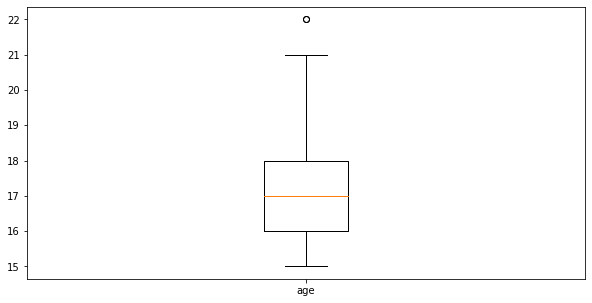

Age otliers:  {22}


In [102]:
# 'age' seems strange in min and max values for students
plt.figure(figsize=(10, 5))
box_plot = plt.boxplot(data["age"], labels=['age'])
plt.show()
flier_values = box_plot['fliers'][0].get_ydata()
print('Age otliers: ', set(flier_values))

In [104]:
# Find fliers for all columns
def find_outliers(data_frame=data) -> dict:
    fliers_info = dict()
    for label in data_frame.columns:
        if label == "ID" or data_frame[label].dtypes == 'object':
            continue
        box_plot = plt.boxplot(data_frame[label], labels=[label])
        fliers_set = set(box_plot['fliers'][0].get_ydata())
        if (len(fliers_set)):
            fliers_info[label] = fliers_set
    plt.close()
    return fliers_info
print("Otliers numeric:")
print_dict(find_outliers())

Otliers numeric:
Key         Item
----------  ----------------------------------------------------------------------------
age         {22}
traveltime  {4}
studytime   {4}
failures    {1, 2, 3}
famrel      {1, 2}
freetime    {1}
Dalc        {4, 5}
absences    {16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 38, 40, 54, 56, 75}
G1          {0}
G2          {0}
G3          {0, 1}


##### Categorical columns  
For this we must make 'One hot encoding' for categorical columns  
p.s. encoded data will be highly useful later

In [24]:
# Label encoding
object_labels = [label for label in data.columns if data[label].dtypes == 'object']
data_labels_enc = data[object_labels].copy()

cats_info = count_categories(data_labels_enc)
for label in data_labels_enc.columns:
    cats_info[label] = (tuple(cats_info[label][0]), cats_info[label][1])
    for i in range(cats_info[label][1]):
        data_labels_enc[label].replace(cats_info[label][0][i], i, inplace=True)
data_labels_enc.head(5)


,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,1,0,0,2,0,2,1,1,1,1,1,0,0,0,1
1,0,0,1,1,0,1,0,0,2,2,1,1,1,0,1,0,0,1
2,0,0,0,1,1,1,1,2,2,2,1,1,1,1,1,0,0,1
3,0,1,0,1,0,1,0,2,1,1,1,1,1,0,0,0,0,1
4,0,0,1,1,0,1,4,0,1,2,1,0,1,1,0,0,1,1


In [25]:
# One hot encoding for several catigorical columns
enc = OneHotEncoder(handle_unknown='ignore')

ohenc_labels = ['Mjob', 'Fjob', 'guardian', 'reason']
ohenc_data = pd.DataFrame(enc.fit_transform(data_labels_enc[ohenc_labels]).toarray())
ohenc_data.columns = ['is_' + label + '_'+ str(cats_info[label][0][i]) 
                     for label in ohenc_labels
                     for i in range(cats_info[label][1])]
for label in ohenc_data.columns:
    ohenc_data[label] = ohenc_data[label].apply(int, convert_dtype=True)
ohenc_data.head(5)

,is_Mjob_other,is_Mjob_health,is_Mjob_services,is_Mjob_teacher,is_Mjob_at_home,is_Fjob_other,is_Fjob_health,is_Fjob_services,is_Fjob_teacher,is_Fjob_at_home,is_guardian_other,is_guardian_father,is_guardian_mother,is_reason_other,is_reason_home,is_reason_course,is_reason_reputation
0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0


In [26]:
# Drop one hot encoded columns and leave only binary
data_labels_enc = data_labels_enc.drop(ohenc_labels, axis=1)
# Rename columns binary categorical columns to understand what does '1' mean in cells
data_labels_enc.columns = ['is_' + label + '_'+ str(cats_info[label][0][1]) for label in data_labels_enc.columns]
data_labels_enc.head(5)

,is_Subject_Math,is_school_MS,is_sex_F,is_address_U,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,is_higher_no,is_internet_no,is_romantic_no
0,0,0,1,1,0,0,1,1,1,1,0,0,0,1
1,0,0,1,1,0,1,1,1,1,0,1,0,0,1
2,0,0,0,1,1,1,1,1,1,1,1,0,0,1
3,0,1,0,1,0,1,1,1,1,0,0,0,0,1
4,0,0,1,1,0,1,1,0,1,1,0,0,1,1


In [27]:
# Now we have DataFrame with one hot encoding for all categorical columns
data_object_encoded = data_labels_enc.join(ohenc_data)
data_object_encoded.head(5)

,is_Subject_Math,is_school_MS,is_sex_F,is_address_U,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,is_higher_no,is_internet_no,is_romantic_no,is_Mjob_other,is_Mjob_health,is_Mjob_services,is_Mjob_teacher,is_Mjob_at_home,is_Fjob_other,is_Fjob_health,is_Fjob_services,is_Fjob_teacher,is_Fjob_at_home,is_guardian_other,is_guardian_father,is_guardian_mother,is_reason_other,is_reason_home,is_reason_course,is_reason_reputation
0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,0,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0


In [105]:
print("Otliers (categorical):")
print_dict(find_outliers(data_object_encoded))

Otliers (categorical):
Key                   Item
--------------------  ------
is_Pstatus_T          {0}
is_schoolsup_no       {0}
is_paid_no            {0}
is_nursery_no         {1}
is_higher_no          {1}
is_internet_no        {1}
is_Mjob_health        {1}
is_Mjob_services      {1}
is_Mjob_teacher       {1}
is_Mjob_at_home       {1}
is_Fjob_health        {1}
is_Fjob_teacher       {1}
is_Fjob_at_home       {1}
is_guardian_other     {1}
is_guardian_father    {1}
is_reason_other       {1}
is_reason_home        {1}
is_reason_reputation  {1}



##### Conclusion: 
For binary categories we can ignore otliers, or ignore the whole feature because of usefulness of single value feature

#### Now we have:
* data_object_encoded - all categorical(object) data with one hot encoding
* ohenc_labels - labels of one hot encoding
* object_labels - labels of object columns


### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

##### Subtask 1

In [29]:
data.describe(include="all")

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,NaN,2,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Por,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,649,772,591,NaN,759,738,923,NaN,NaN,399,584,430,728,NaN,NaN,NaN,925,640,824,528,835,955,827,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,547092.482759,NaN,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,NaN,NaN,1.522989,1.970307,0.264368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.936782,3.201149,3.156130,1.492337,2.288314,3.543103,4.434866,11.213602,11.246169,11.341954
std,263886.628434,NaN,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,NaN,NaN,0.731727,0.834353,0.656142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928833,1.031507,1.152575,0.911700,1.282008,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


##### Subtask 2

In [30]:
data['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

##### Subtask 3

In [31]:
data['Subject'].value_counts()

Por     649
Math    395
Name: Subject, dtype: int64

##### Subtask 4

Failures: 
Key        Item
-----  --------
Math   0.334177
Por    0.22188
Conclusion:
There are more failures in Math course


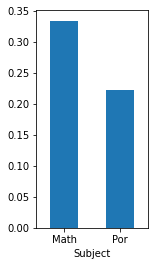

In [132]:
# find mean because there are different number of students in the courses
subj_failures = data.groupby('Subject')['failures'].mean()
subj_failures.plot.bar(figsize=(2, 4), rot = 0)
print('Failures: ')
print_dict(dict(subj_failures))
print('Conclusion:\nThere are more failures in Math course')

##### Subtask 5

Study time:
Key       Item
-----  -------
Math   2.03544
Por    1.93066
Conclusion: 
2-5 hours in general for both subjects


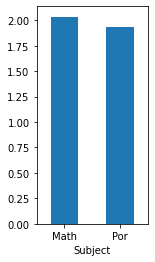

In [131]:
# Subtask 5 
subj_time = data.groupby('Subject')['studytime'].mean()
subj_time.plot.bar(figsize=(2, 4), rot = 0)
print("Study time:")
print_dict(dict(subj_time))
print("Conclusion: \n2-5 hours in general for both subjects")

##### Subtask 6

Conclusion: 
Main reason is 'course'


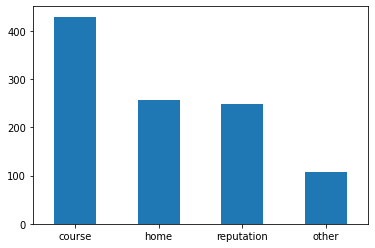

In [133]:
reasons = data['reason'].value_counts()
r_bar = reasons.plot.bar(rot=0)
print("Conclusion: \nMain reason is 'course'")

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

In [35]:
# Create 3 DataFrames with grades
g1 = data['G1']
g2 = data['G2']
g3 = data['G3']

g1_p = data[data['Subject'] == "Por"]['G1']
g2_p = data[data['Subject'] == "Por"]['G2']
g3_p = data[data['Subject'] == "Por"]['G3']

g1_m = data[data['Subject'] == "Math"]['G1']
g2_m = data[data['Subject'] == "Math"]['G2']
g3_m = data[data['Subject'] == "Math"]['G3']

grades = pd.concat([g1, g2, g3], axis = 1)
grades_p = pd.concat([g1_p, g2_p, g3_p], axis = 1)
grades_m = pd.concat([g1_m, g2_m, g3_m], axis = 1)

Compare distribution between all (both Port and Math) grades - G1, G2, G3

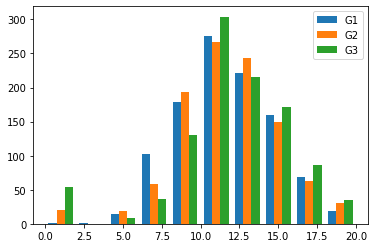

In [37]:
plt.figure(figsize=(6,4))
plt.hist(grades, label=['G1', 'G2', 'G3'])
plt.legend()
plt.show()

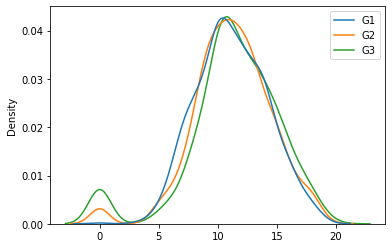

In [38]:
dencity_graph = sns.kdeplot(data=grades)

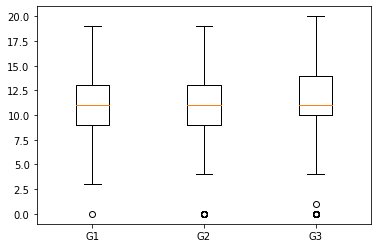

Grade    Otliers
-------  ---------
G1       {0}
G2       {0}
G3       {0, 1}


In [229]:
plt.figure(figsize=(6, 4))
plt.boxplot(grades, labels=['G1', 'G2', 'G3'])
plt.show()
print_dict(find_outliers(grades), 'Grade', 'Otliers')

In [142]:
print(grades['G1'].value_counts()[0])
print(grades['G2'].value_counts()[0])
print(grades['G3'].value_counts()[0])

1
20
53


#### Conclusion 1:  
The distribution between G1, G2 and G3 expectedly highly similar.   
There are minor flactuations between each value (0-20).  

However we can see some differences in low grades (0-1): 
* In G3 '1' is also outlier (beside '0' in all grades)  
the reson might be the accumalation of 2 grades in G3  
* That assumption is proved by G3 boxplot:  
the body (box) is higher than those for G1 and G2  

Now compare distribution of every grade between Portugal and Math subjects

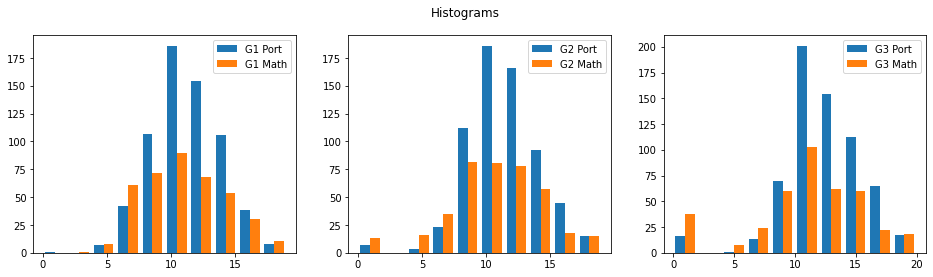

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Histograms')

ax1.hist([g1_p, g1_m], label=['G1 Port', 'G1 Math'])
ax1.legend()

ax2.hist([g2_p, g2_m], label=['G2 Port', 'G2 Math'])
ax2.legend()

ax3.hist([g3_p, g3_m], label=['G3 Port', 'G3 Math'])
ax3.legend()
plt.show()

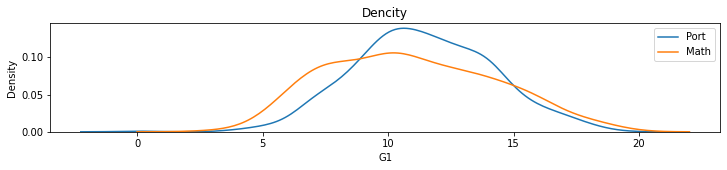

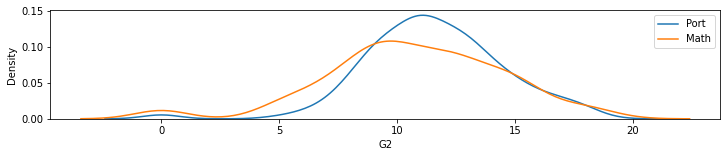

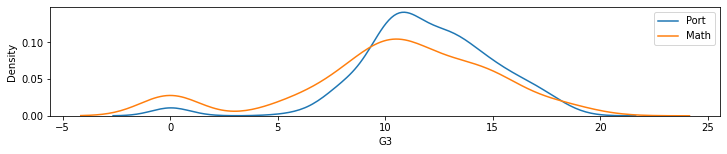

In [43]:
plt.figure(figsize=(12, 2))
plt.title('Dencity')
sns.kdeplot(data=g1_p, label='Port')
sns.kdeplot(data=g1_m, label='Math')
plt.legend()
plt.show()

plt.figure(figsize=(12, 2))
sns.kdeplot(data=g2_p, label='Port')
sns.kdeplot(data=g2_m, label='Math')
plt.legend()
plt.show()

plt.figure(figsize=(12, 2))
sns.kdeplot(data=g3_p, label='Port')
sns.kdeplot(data=g3_m, label='Math')
plt.legend()
plt.show()

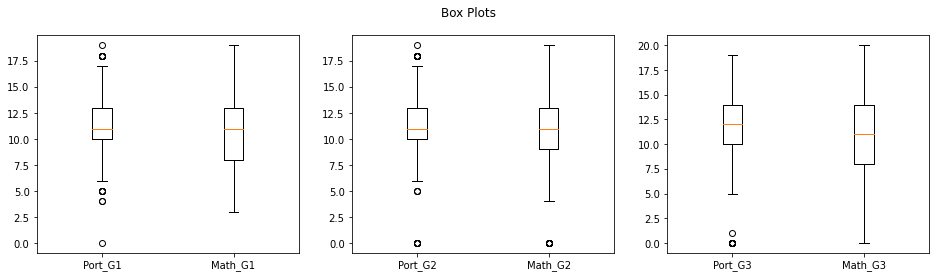

In [44]:
# Boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Box Plots')

ax1.boxplot([g1_p, g1_m], labels=['Port_G1', 'Math_G1'])
ax2.boxplot([g2_p, g2_m], labels=['Port_G2', 'Math_G2'])
ax3.boxplot([g3_p, g3_m], labels=['Port_G3', 'Math_G3'])

plt.show()

#### Conclusion 2:
* Based on Histograms: Por grades are more in number of observations
* Based on Dencity: Math grades have more uniform and even distribution than Port. The sharp increases of blue line in center of the graphics tell about the high predominance of middle grades (8-15)
* Based on BoxPlots: They confirm previous assumptions - Port has more outliers and less long whiskers - result of uneven distribution.
* Medians are almost same, a bit dif. only in G3

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [61]:
numeric_labels = ["age", "failures", "absences", "G1", "G2", "G3"]
cov_matrix_numeric = data[numeric_labels].corr()
cov_matrix_numeric

,age,failures,absences,G1,G2,G3
age,1.000000,0.282364,0.153196,-0.124121,-0.119475,-0.125282
failures,0.282364,1.000000,0.099998,-0.374175,-0.377172,-0.383145
absences,0.153196,0.099998,1.000000,-0.092425,-0.089332,-0.045671
G1,-0.124121,-0.374175,-0.092425,1.000000,0.858739,0.809142
G2,-0.119475,-0.377172,-0.089332,0.858739,1.000000,0.910743
G3,-0.125282,-0.383145,-0.045671,0.809142,0.910743,1.000000


<Figure size 1080x720 with 0 Axes>

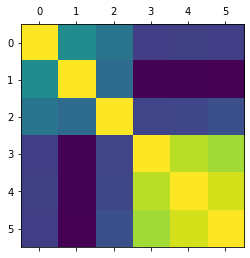

In [62]:
plt.figure(figsize=(15, 10))
plt.matshow(cov_matrix_numeric)
plt.show()

#### Conclusion2 :
1) We can see strong straight dependence between the Grades (by toxic green color on image):
    that's true - the higher G1 or G2, the higher G3  
2) There is negative dependence between number of failures and the Grades (deep blue color):
    more failures - less grade  
**Note:** other correlations are low

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

##### Find labels with categorical data but already ordered
we don't have to encode it because the rise of the encoding number corresponds to the value  
example: 0 < 5 as 'no education' < 'higher education'  

In [152]:
categorical_ordered_labels = set(data.columns) - set(object_labels) - set(['ID']) - set(numeric_labels)
data_object_ordered = data[categorical_ordered_labels].copy()

Now join ordered and encoded data (we've done encoding earlier in otliners task)

In [153]:
data_categorical = data_object_ordered.join(data_object_encoded)
cov_matrix_categorical = data_categorical.corr()
cov_matrix_categorical

,Fedu,health,traveltime,freetime,studytime,Dalc,goout,famrel,Walc,Medu,is_Subject_Math,is_school_MS,is_sex_F,is_address_U,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,is_higher_no,is_internet_no,is_romantic_no,is_Mjob_other,is_Mjob_health,is_Mjob_services,is_Mjob_teacher,is_Mjob_at_home,is_Fjob_other,is_Fjob_health,is_Fjob_services,is_Fjob_teacher,is_Fjob_at_home,is_guardian_other,is_guardian_father,is_guardian_mother,is_reason_other,is_reason_home,is_reason_course,is_reason_reputation
Fedu,1.000000,0.034288,-0.196328,0.002142,0.033458,-0.000379,0.030075,0.013705,0.015796,0.642063,0.094795,-0.187611,-0.070786,0.124303,-0.047290,-0.049156,-0.032450,-0.153342,-0.118897,-0.093800,-0.104681,-0.191956,-0.170012,0.037402,-0.200426,0.133393,0.079390,0.307594,-0.188731,-0.230861,0.202267,0.024698,0.348978,-0.084975,-0.072834,0.094286,-0.046298,-0.025451,0.011945,-0.059851,0.075322
health,0.034288,1.000000,-0.029002,0.081517,-0.063044,0.063366,-0.013736,0.107842,0.105262,-0.013254,0.006205,-0.053214,-0.141113,-0.010895,-0.009147,0.016213,-0.000785,-0.022668,0.009043,-0.017165,0.005869,-0.008036,0.041685,0.001333,-0.034189,0.036168,0.075564,0.017106,-0.078445,0.029574,0.089110,-0.062321,0.018647,-0.036065,-0.012256,0.011183,-0.003484,0.007388,-0.015782,0.116804,-0.124371
traveltime,-0.196328,-0.029002,1.000000,-0.007403,-0.081328,0.110928,0.049740,-0.010556,0.084402,-0.238181,-0.079881,0.258834,-0.042508,-0.343803,0.031550,0.033883,0.033940,0.026117,0.083679,0.025834,0.018641,0.081857,0.169485,-0.012305,0.038616,-0.106540,-0.068560,-0.083252,0.170171,0.099122,-0.090635,-0.031258,-0.021649,-0.052228,0.070983,0.024526,-0.061961,0.040928,-0.112132,0.128033,-0.063705
freetime,0.002142,0.081517,-0.007403,1.000000,-0.094429,0.145392,0.323556,0.136372,0.128659,0.001054,0.025949,0.026008,-0.181603,-0.009744,-0.007249,0.038714,0.026126,-0.006227,0.034747,-0.128601,0.013837,0.086824,-0.061016,-0.014712,-0.017702,-0.015520,0.017525,0.072738,-0.047825,0.038416,-0.039445,-0.051199,0.003558,0.045318,0.048511,-0.032711,0.003161,-0.008310,-0.064393,0.082123,-0.023762
studytime,0.033458,-0.063044,-0.081328,-0.094429,1.000000,-0.159742,-0.072941,0.007473,-0.227727,0.090616,0.060934,-0.133255,0.239972,0.037480,-0.035109,0.005049,-0.070598,-0.143858,-0.105704,-0.078847,-0.056817,-0.186556,-0.049695,-0.035986,-0.007451,-0.015221,0.019401,0.020386,-0.018424,-0.038541,0.107722,0.011951,-0.033607,0.004087,0.018770,0.011457,-0.020958,-0.097277,-0.019542,-0.084553,0.187202
Dalc,-0.000379,0.063366,0.110928,0.145392,-0.159742,1.000000,0.253424,-0.073034,0.626551,-0.001096,-0.014030,0.067255,-0.273531,-0.065319,0.077001,0.015016,0.025098,0.023946,-0.037851,0.010609,0.081700,0.113608,-0.041025,-0.047983,-0.003120,-0.075688,0.045862,0.025456,-0.014899,-0.062511,-0.017240,0.098913,-0.013059,-0.029019,0.082680,0.035723,-0.078755,0.134013,0.041371,-0.031405,-0.101511
goout,0.030075,-0.013736,0.049740,0.323556,-0.072941,0.253424,1.000000,0.083563,0.399705,0.025614,-0.032011,0.037000,-0.062530,0.030790,0.005889,0.020498,0.051227,-0.005252,0.012943,-0.072236,-0.013779,0.062837,-0.083766,-0.003879,0.006338,0.046969,0.031040,-0.043558,-0.036958,0.043242,0.006843,-0.021470,-0.031480,-0.023500,0.005225,-0.064810,0.056714,-0.002354,-0.012108,0.028489,-0.018991
famrel,0.013705,0.107842,-0.010556,0.136372,0.007473,-0.073034,0.083563,1.000000,-0.093377,0.014524,0.004194,-0.037150,-0.070026,-0.013936,-0.008285,0.039807,0.011288,0.003263,-0.014947,-0.050808,-0.025236,-0.034632,-0.066825,0.050924,0.002599,-0.037646,0.039559,-0.008692,-0.012561,0.020615,0.003144,0.042432,-0.055043,-0.070197,-0.013695,0.005767,0.002297,0.002804,-0.016001,-0.003807,0.018614
Walc,0.015796,0.105262,0.084402,0.128659,-0.227727,0.626551,0.399705,-0.093377,1.000000,-0.031006,0.006344,0.026531,-0.302245,-0.045020,0.089953,0.046438,0.094815,0.071398,-0.045036,-0.004829,0.083583,0.086569,-0.043410,0.016684,-0.046208,0.023224,0.028632,0.012495,0.000129,0.0114

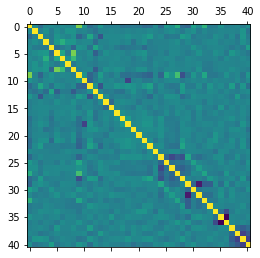

In [69]:
plt.matshow(cov_matrix_categorical)
plt.show()

Let's look only on interesting correlation levels

In [228]:
def find_high_cov(data, cov_level=0.3) -> dict:
    high_cov = dict()
    for c in range(len(data.columns)):
        for i in range(c + 1, len(data.columns)):
            label_c = data.columns[c]
            label_i = data.columns[i]
            value = data.loc[label_c, label_i]
            if abs(value) >= cov_level:
                high_cov[(label_c, label_i)] = value
    return high_cov
print_dict(find_high_cov(cov_matrix_categorical), 'Pair', 'Cov')

Pair                                                Cov
--------------------------------------------  ---------
('Fedu', 'Medu')                               0.642063
('Fedu', 'is_Mjob_teacher')                    0.307594
('Fedu', 'is_Fjob_teacher')                    0.348978
('traveltime', 'is_address_U')                -0.343803
('freetime', 'goout')                          0.323556
('Dalc', 'Walc')                               0.626551
('goout', 'Walc')                              0.399705
('Walc', 'is_sex_F')                          -0.302245
('Medu', 'is_Mjob_teacher')                    0.452952
('Medu', 'is_Mjob_at_home')                   -0.387814
('is_Subject_Math', 'is_paid_no')             -0.473453
('is_school_MS', 'is_address_U')              -0.341657
('is_Mjob_other', 'is_Mjob_services')         -0.428556
('is_Mjob_other', 'is_Mjob_at_home')          -0.375749
('is_Fjob_other', 'is_Fjob_services')         -0.702118
('is_guardian_other', 'is_guardian_mother')   -0

#### Conclusion:
**NOTE:** One hot encoded values from one category have high negative covariation because they interchange each other.
(ex: ('is_reason_home', 'is_reason_reputation') ('is_reason_course', 'is_reason_reputation'))
* Fedu and Medu - people are more likely to choose a couple with an appropriate level of education (the same output have pair 'Fedu' and 'is_Mjob_teacher')
* Fedu and is_Fjob_teacher / Medu and is_Mjob_teacher - teachers have higher education level
* Traveltime and is_address_U - negative cov tells that traveltime increase for those who not in the city (not U - 0 in cell of column)
* Freetime and goout - positive cov means that more freetime gives more oppertunities to party with friends
* Dalc and Walc - connected, because refer to one feature - alcohol (person's habit).
* Goout and Walc - because people have parties in weekend and often with alcohol
* Walc and is_sex_F - - negative cov - females drink less
* Medu and is_Mjob_at_home - negative cov - if mom sits at home its probably because of lower education level
* is_Subject_Math and is_paid_no - negative cov - less paid courses in Por 
* is_school_MS and is_address_U - negative cov - students from city less often choose MS school



### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

##### Subtask 1

In [187]:

alco_data_sex = data.filter(['sex','Dalc','Walc'], axis=1)
alco_data_sex = alco_data_sex.groupby('sex').mean()
alco_data_sex['Mean'] = alco_data_sex.mean(axis=1)

alco_data_sex = alco_data_sex.T
alco_data_sex.index.name = 'AlcoType'
alco_data_sex

sex,F,M
AlcoType,,
Dalc,1.274112,1.777042
Walc,1.949239,2.730684
Mean,1.611675,2.253863


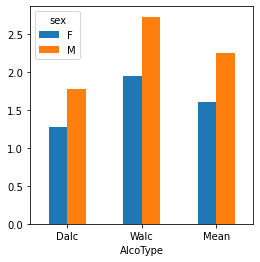

In [188]:
#Visualization
alco_data_sex.plot.bar(rot=0, subplots=False, figsize=(4, 4))
plt.show()

#### Conclusion 
We can see that Males drink more than Females in all categories

##### Subtask 2

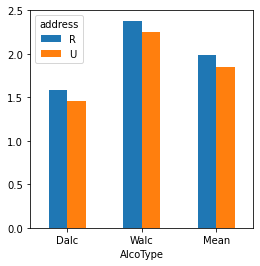

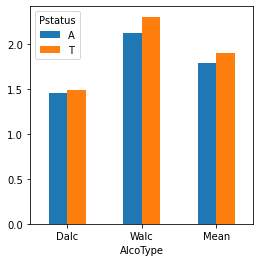

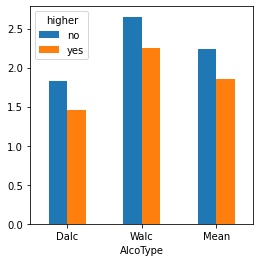

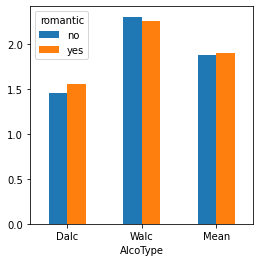

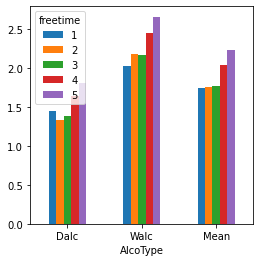

In [189]:
compare_labels = ['address', 'Pstatus', 'higher', 'romantic', 'freetime']
for label in compare_labels: 
    alco_data_temp = data.filter([label,'Dalc','Walc'], axis=1)
    alco_data_temp = alco_data_temp.groupby(label).mean()
    alco_data_temp['Mean'] = alco_data_temp.mean(axis=1)

    alco_data_temp = alco_data_temp.T
    alco_data_temp.index.name = 'AlcoType'
    #Visualization
    alco_data_temp.plot.bar(rot=0, subplots=False, figsize=(4, 4))
    plt.show()


#### Conclusion
* Adress: Students drink more living in a countryside
* Pstatus: Almost the same but students which parents live together drink a bit more (have money? :D)
* Higher: Students who are going to get higher ed. drink less (think about the future)
* Romantic: That's interesting, because the result depends on a part of the week. Stduents in relationships drink more on weekdays and less on weekend. However in mean, it's similar, but romatics drink more (have a good compnay I guess)
* Freetime: The distribution change a bit through the week part, but in general - more free time means more alcohol (busy man - healthy man)

##### Subtask 3

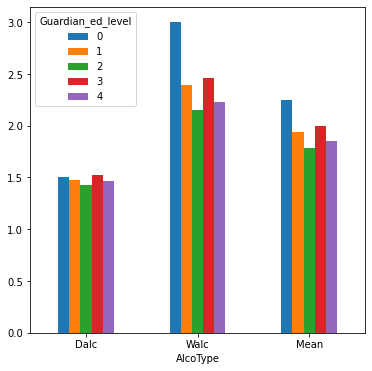

In [213]:
guardian_ed_levev = list()
for i in data.index:
    row = data.loc[i]
    if row['guardian'] == 'mother':
        guardian_ed_levev.append(row['Medu'])
    elif row['guardian'] == 'father':
        guardian_ed_levev.append(row['Fedu'])
    else: guardian_ed_levev.append(-1)

data_temp = data.copy()
data_temp['Guardian_ed_level'] = guardian_ed_levev
data_temp = data_temp[data_temp['Guardian_ed_level'] != -1]
data_temp = data_temp[['Guardian_ed_level', 'Dalc', 'Walc']]

data_temp = data_temp.groupby('Guardian_ed_level').mean()
data_temp['Mean'] = data_temp.mean(axis=1)

data_temp_t = data_temp.T
data_temp_t.index.name = 'AlcoType'
#Visualization
data_temp_t.plot.bar(rot=0, subplots=False, figsize=(6, 6))
plt.show()

In [227]:
alco_ed_rating = dict(data_temp['Mean'])
print('Drink rating:')
print_dict(dict(sorted(alco_ed_rating.items(), key=lambda item: item[1])), 
           'Ed.Level', 'Drink Level')

Drink rating:
  Ed.Level    Drink Level
----------  -------------
         2        1.78881
         4        1.84932
         1        1.9386
         3        1.99559
         0        2.25


#### Conclusion:
* The distribution is equal for the whole week but the dependence is not linear. 
* Students which guardian has no education drink significantly more (full rating in dict higher)


##### Subtask 4

In [268]:
best50_p = data[data['Subject'] == 'Por'].sort_values(by='G3').loc[::-1].iloc[:50][['Walc', 'Dalc']].mean()

best50_m = data[data['Subject'] == 'Math'].sort_values(by='G3').loc[::-1].iloc[:50][['Walc', 'Dalc']].mean()

worst50_p = data[data['Subject'] == 'Por'].sort_values(by='G3').iloc[:50][['Walc', 'Dalc']].mean()

worst50_m = data[data['Subject'] == 'Math'].sort_values(by='G3').iloc[:50][['Walc', 'Dalc']].mean()

comp_50_port = pd.DataFrame({'Best50': best50_p, 'Worst50': worst50_p})
comp_50_math = pd.DataFrame({'Best50': best50_m, 'Worst50': worst50_m})

mean_p = pd.Series({'Best50': best50_p.mean(), 'Worst50':worst50_p.mean()}, name = 'Mean')
comp_50_port = comp_50_port.append(mean_p)

mean_m = pd.Series({'Best50': best50_m.mean(), 'Worst50':worst50_m.mean()}, name = 'Mean')
comp_50_math = comp_50_math.append(mean_m)

print(comp_50_port)
print(comp_50_math)



      Best50  Worst50
Walc    1.92     2.72
Dalc    1.24     1.86
Mean    1.58     2.29
      Best50  Worst50
Walc    1.92     2.14
Dalc    1.22     1.48
Mean    1.57     1.81


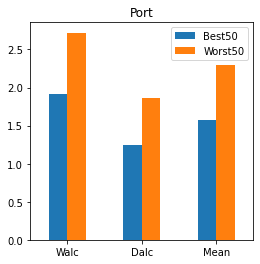

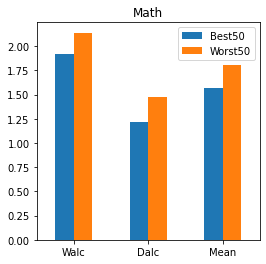

In [273]:
#Visualization
comp_50_port.plot.bar(rot=0, subplots=False, figsize=(4, 4), title='Port')
plt.show()

comp_50_math.plot.bar(rot=0, subplots=False, figsize=(4, 4), title='Math')
plt.show()

#### Conclusion:
* With both Port and Math courses best students drink less than worst
* In Port the difference in drinking between best and worst is bigger

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

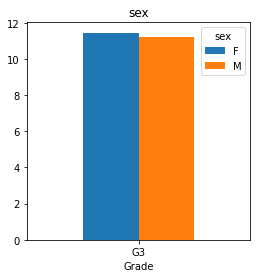

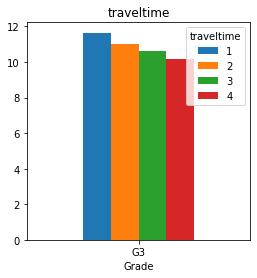

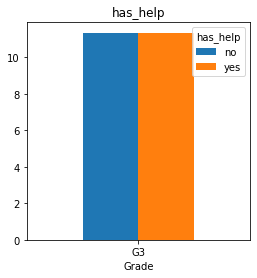

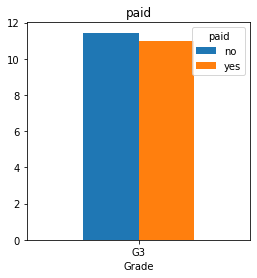

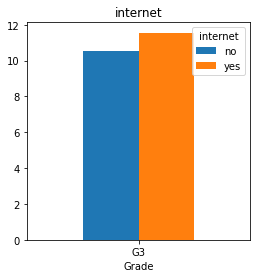

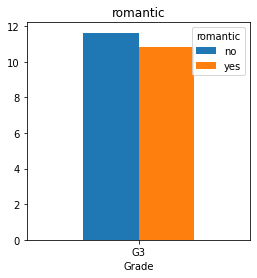

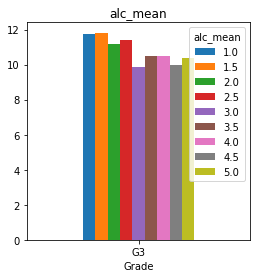

In [319]:
data_comp = data.copy()
has_help = ['yes' if (data.loc[i]['schoolsup'] == 'yes' 
                      or data.loc[i]['famsup'] == 'yes') else 'no'
            for i in data.index]
data_comp['has_help'] = has_help

data_comp['alc_mean'] = data_comp[['Walc', 'Dalc']].mean(axis=1)

compare_labels = ['sex', 'traveltime', 'has_help', 'paid', 
                  'internet', 'romantic', 'alc_mean']

for label in compare_labels: 
    comp_data_temp = data_comp.filter([label,'G3'], axis=1)
    comp_data_temp = comp_data_temp.groupby(label).mean()
    comp_data_temp = comp_data_temp.T
    comp_data_temp.index.name = 'Grade'
    #Visualization
    comp_data_temp.plot.bar(rot=0, subplots=False, figsize=(4, 4), title = label)
    plt.show()

#### Conclusion:
* Sex: females have better grades than males
* Traveltime: more travel time to school - worse grades. Linear dependence.
* Help: doesn't affect the grade
* Paid: students who take paid classes have worse grades (that's the reason of paid classes' need)
* Internet: internet helps to increase grades
* Romantic: better grades of students without relationships
* Alcohol: general dependence - less alcohol, better grades. However, there are fluctuations.

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [322]:
# Create new column G4
new_grade = list()
for i in data.index:
    g3_value = data.loc[i]['G3']
    if 18 <= g3_value <= 20:
        new_grade.append('Excellent')
    elif 14 <= g3_value <= 17:
        new_grade.append('Good')
    elif 8 <= g3_value <= 13:
        new_grade.append('Passed')
    else:
        new_grade.append('Not Passed')
data['G4'] = new_grade
data.head(5)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G4
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14,Good
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17,Good
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10,Passed
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16,Good
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13,Passed


In [442]:
# Create dataframe with counted values
data_temp = data[['reason', 'G4']]
counted_g4 = data_temp.groupby('reason')['G4'].value_counts()
counted_g4 = counted_g4.to_frame().unstack(level=-1)
counted_g4.index.name = 'reason'
counted_g4



G4                       
G4         Excellent Good Not Passed Passed
reason                                     
course            13   89         46    282
home               8   60         22    168
other              2   23         14     69
reputation        12   87         18    131

In [443]:
sumed = counted_g4.sum(axis=1)
counted_g4_percented = counted_g4.div(sumed, axis=0)
counted_g4_percented

G4                               
G4         Excellent      Good Not Passed    Passed
reason                                             
course      0.030233  0.206977   0.106977  0.655814
home        0.031008  0.232558   0.085271  0.651163
other       0.018519  0.212963   0.129630  0.638889
reputation  0.048387  0.350806   0.072581  0.528226

In [447]:
sumed = counted_g4.sum(axis=0);
counted_g4_percented2 = counted_g4.div(sumed, axis=1)
counted_g4_percented2 = counted_g4_percented2.T
counted_g4_percented2

reason           course      home     other  reputation
   G4                                                  
G4 Excellent   0.371429  0.228571  0.057143    0.342857
   Good        0.343629  0.231660  0.088803    0.335907
   Not Passed  0.460000  0.220000  0.140000    0.180000
   Passed      0.433846  0.258462  0.106154    0.201538

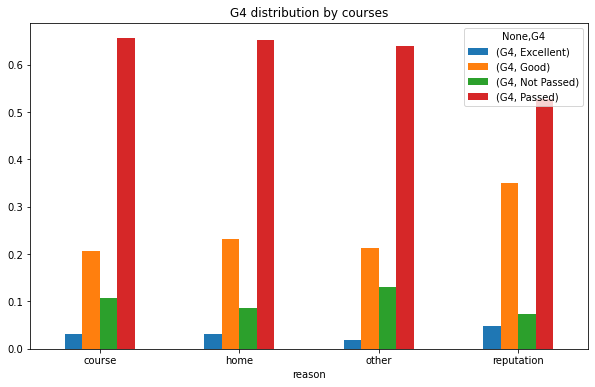

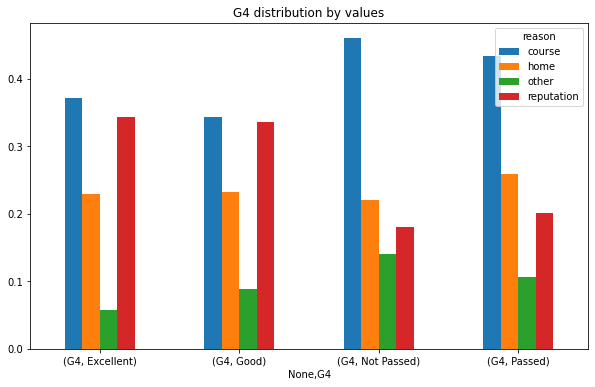

In [448]:
counted_g4_percented.plot.bar(rot=0, subplots=False, figsize=(10, 6), title = 'G4 distribution by courses')
plt.show()
counted_g4_percented2.plot.bar(rot=0, subplots=False, figsize=(10, 6), title = 'G4 distribution by values')
plt.show()



#### Conclusion:
* better grades - more influence of reputation on school choice
* home reason is almost equal to all grades
* students with low grades interested only on course
* excellent students have less 'other' reasons

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [393]:
# Let's try to find features which do not depends on course, but the personality
# and find rows with similar features
personal_features = ['school', 'sex', 'age', 'address', 'school', 'reason', 'traveltime',
                     'famsize', 'Pstatus', 'Medu', 'Fedu', 
                     'Mjob', 'Fjob', 'reason', 'guardian', 'nursery', 
                     'higher', 'internet', 'romantic', 'famrel', 'goout',
                     'Dalc', 'Walc', 'health']

duplicates = data[data.duplicated(personal_features, keep='first')] 
print('Number of two courses students: ', len(duplicates))

Number of two courses students:  359


In [421]:
dup_results = data.groupby(personal_features).size()                                 
dup_results = dup_results[dup_results > 1].to_frame()

dup_groups = list()
for i in range(len(dup_results.values)):
    row = dup_results.iloc[i]
    
    names = list(row.name)
    temp_data = data.copy()
    for value in names:
        label = personal_features[names.index(value)]
        temp_data = temp_data[temp_data[label] == value]
    dup_groups.append(temp_data)

# delete coincidences
dup_groups = [group for group in dup_groups
    if (group.iloc[0]['Subject'] != group.iloc[1]['Subject'])]

print('Number of two courses students: ', len(dup_groups))
# dup_groups - a list of row pairs (Math and Port) of one student
dup_groups[0]

Number of two courses students:  357


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G4
439,474506,Math,GP,F,15,R,GT3,T,2,4,services,health,course,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8,Passed
639,644985,Por,GP,F,15,R,GT3,T,2,4,services,health,course,mother,1,3,0,yes,yes,no,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,11,10,Passed


In [428]:
greater_grade = list()


for group in dup_groups:
    math_g3 = group[group['Subject'] == 'Math']['G3'].iloc[0]
    port_g3 = group[group['Subject'] == 'Por']['G3'].iloc[0]
    greater_grade.append('Math' if math_g3 > port_g3 else 'Por')
    
greater_grade = pd.DataFrame({'Better': greater_grade})
greater_grade = greater_grade.groupby('Better').size()
greater_grade


Better
Math     89
Por     268
dtype: int64

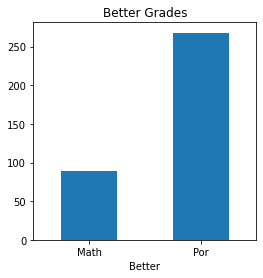

In [429]:
greater_grade.plot.bar(rot=0, figsize=(4, 4), title = 'Better Grades')
plt.show()

#### Conclusion:
* There are 357 students, who visit both courses
* There is much more students with better grades in Portuguese than in Math

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [463]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

We have to predict G4 - categorical value, so let's use classification algorythm

### Create Learning data

In [465]:
# Create learning data (add one hot encoded)
learning_data = data.drop(columns=['ID', 'G1', 'G2', 'G3', 'G4'])
learning_data = learning_data.drop(columns=object_labels)
learning_data = learning_data.join(data_object_encoded)

x = learning_data
y = data['G4']
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,is_Subject_Math,is_school_MS,is_sex_F,is_address_U,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,is_higher_no,is_internet_no,is_romantic_no,is_Mjob_other,is_Mjob_health,is_Mjob_services,is_Mjob_teacher,is_Mjob_at_home,is_Fjob_other,is_Fjob_health,is_Fjob_services,is_Fjob_teacher,is_Fjob_at_home,is_guardian_other,is_guardian_father,is_guardian_mother,is_reason_other,is_reason_home,is_reason_course,is_reason_reputation
0,16,3,4,1,1,0,3,2,1,1,4,5,12,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,17,3,2,1,2,0,5,3,4,1,3,3,2,0,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,16,1,2,2,1,2,4,4,5,3,5,5,0,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,17,2,3,2,2,0,4,4,3,1,1,3,4,0,1,0,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,16,1,1,2,1,0,4,3,2,1,4,5,2,0,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,15,3,3,2,3,2,4,2,1,2,3,3,8,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1040,15,2,1,1,2,0,5,4,2,1,1,5,4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1041,16,1,1,3,2,0,5,3,2,1,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1042,16,2,1,4,1,0,3,2,1,1,1,2,4,0,0,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0


### Scale data

In [469]:
keys = x.keys()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.77837403,  1.25015583,  0.56571416, ..., -0.5925645 ,
        -0.81039869,  1.78773038],
       [ 1.77837403,  0.36250267,  0.56571416, ...,  1.68758   ,
        -0.81039869, -0.55936847],
       [ 1.77837403,  1.25015583,  1.47064007, ..., -0.5925645 ,
        -0.81039869,  1.78773038],
       ...,
       [ 0.20116499, -1.41280365, -0.33921175, ..., -0.5925645 ,
         1.23396054, -0.55936847],
       [ 0.20116499,  0.36250267,  0.56571416, ...,  1.68758   ,
        -0.81039869, -0.55936847],
       [-0.58743954, -0.52515049,  0.56571416, ..., -0.5925645 ,
        -0.81039869,  1.78773038]])

### Random Forest Classifier

In [501]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [502]:
pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

   Excellent       0.50      0.17      0.25         6
        Good       0.60      0.45      0.51        60
  Not Passed       0.50      0.33      0.40        12
      Passed       0.73      0.85      0.79       131

    accuracy                           0.69       209
   macro avg       0.58      0.45      0.49       209
weighted avg       0.67      0.69      0.67       209

[[  1   1   0   4]
 [  1  27   0  32]
 [  0   2   4   6]
 [  0  15   4 112]]


Let's look on feature influence on a result

In [508]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, keys[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature absences (0.073726)
2. feature age (0.052131)
3. feature Medu (0.049325)
4. feature health (0.047949)
5. feature is_Subject_Math (0.042207)
6. feature famrel (0.041193)
7. feature goout (0.040407)
8. feature studytime (0.040151)
9. feature Fedu (0.039565)
10. feature freetime (0.037299)
11. feature Walc (0.036858)
12. feature failures (0.034067)
13. feature is_paid_no (0.028570)
14. feature traveltime (0.024322)
15. feature Dalc (0.023784)
16. feature is_activities_no (0.022526)
17. feature is_sex_F (0.021687)
18. feature is_romantic_no (0.020372)
19. feature is_famsup_no (0.018599)
20. feature is_reason_reputation (0.018259)
21. feature is_schoolsup_no (0.017545)
22. feature is_Mjob_other (0.016779)
23. feature is_address_U (0.016774)
24. feature is_guardian_father (0.016643)
25. feature is_internet_no (0.015687)
26. feature is_school_MS (0.015169)
27. feature is_Mjob_services (0.014776)
28. feature is_famsize_LE3 (0.013281)
29. feature is_Mjob_health (0.01

### Neural model

In [512]:
feature_num = len(x.columns)
feature_num

44

Let's make our layers size equal to the feature numbers

In [519]:
mlpc = MLPClassifier(hidden_layer_sizes=(feature_num, feature_num, feature_num), max_iter=1000)
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(44, 44, 44), max_iter=1000)

In [522]:
pred_mlpc = mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

   Excellent       0.33      0.17      0.22         6
        Good       0.54      0.47      0.50        60
  Not Passed       0.38      0.42      0.40        12
      Passed       0.76      0.82      0.79       131

    accuracy                           0.67       209
   macro avg       0.50      0.47      0.48       209
weighted avg       0.66      0.67      0.67       209

[[  1   4   0   1]
 [  1  28   2  29]
 [  0   3   5   4]
 [  1  17   6 107]]


In [531]:
mlpc2 = MLPClassifier(hidden_layer_sizes=(feature_num, feature_num, feature_num), max_iter=1000)
mlpc2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(44, 44, 44), max_iter=1000)

In [532]:
pred_mlpc2 = mlpc2.predict(X_test)
print(classification_report(y_test, pred_mlpc2))
print(confusion_matrix(y_test, pred_mlpc2))

              precision    recall  f1-score   support

   Excellent       0.50      0.33      0.40         6
        Good       0.48      0.45      0.47        60
  Not Passed       0.50      0.33      0.40        12
      Passed       0.76      0.82      0.79       131

    accuracy                           0.67       209
   macro avg       0.56      0.48      0.51       209
weighted avg       0.66      0.67      0.66       209

[[  2   3   0   1]
 [  2  27   3  28]
 [  0   3   4   5]
 [  0  23   1 107]]


**NOTE** Results change because of random seed

In [551]:
mlpc3 = MLPClassifier(hidden_layer_sizes=(feature_num, feature_num, feature_num, feature_num), max_iter=1000)
mlpc3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(44, 44, 44, 44), max_iter=1000)

In [552]:
pred_mlpc3 = mlpc3.predict(X_test)
print(classification_report(y_test, pred_mlpc3))
print(confusion_matrix(y_test, pred_mlpc3))

              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         6
        Good       0.51      0.45      0.48        60
  Not Passed       0.32      0.50      0.39        12
      Passed       0.74      0.76      0.75       131

    accuracy                           0.63       209
   macro avg       0.39      0.43      0.40       209
weighted avg       0.63      0.63      0.63       209

[[ 0  3  0  3]
 [ 2 27  3 28]
 [ 1  1  6  4]
 [ 0 22 10 99]]


**NOTE** Here we can see that accuracy is pretty good, but 'Excellent' class not defined by model at all  
Such bad result of it also can be viewed because of low number of observations in data - there are less 'Excellent' students than others

**NOTE** This is also influence Precision and Recall - Precision now less than Recall

### Conclusion:
the results of using scikit learn models depends on:
* the size of data - we have only 1000 observation
* the feature extraction/engineering
* preprocessing of data - encoding, NaN values replacement, search of mistakes
* and also Random :D

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [ ]:
# your code here